In [1]:
!git clone https://github.com/lattice-ai/DeepLabV3-Plus -b tpu
%cd DeepLabV3-Plus

fatal: destination path 'DeepLabV3-Plus' already exists and is not an empty directory.
/kaggle/working/DeepLabV3-Plus


In [2]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from kaggle_datasets import KaggleDatasets
from deeplabv3plus.datasets.tfrecords.commons import plot_result
from deeplabv3plus.datasets import AugmentationFactory, TFRecordLoader, configure_dataset

In [3]:
GCS_PATH = KaggleDatasets().get_gcs_path('human-segmentation-tfrecords')
print(GCS_PATH)

gs://kds-15ddbb4886a014c7982845e3ab2128ec2063798656057465e4ea2757


In [4]:
TRAIN_TFRECORDS = tf.io.gfile.glob(
    os.path.join(
        GCS_PATH,
        'human-segmentation-tfrecords/human-segmentation-train/*.tfrec'
    )
)

print('Number of TFRecord Files:', len(TRAIN_TFRECORDS))

Number of TFRecord Files: 111


In [5]:
loader = TFRecordLoader(image_size=512)
dataset = loader.get_dataset(train_tfrecord_files=TRAIN_TFRECORDS, ignore_order=False)
dataset

<ParallelMapDataset shapes: ((512, 512, 3), (512, 512, 1)), types: (tf.float32, tf.float32)>

In [ ]:
x, y = next(iter(dataset))
x.shape, y.shape

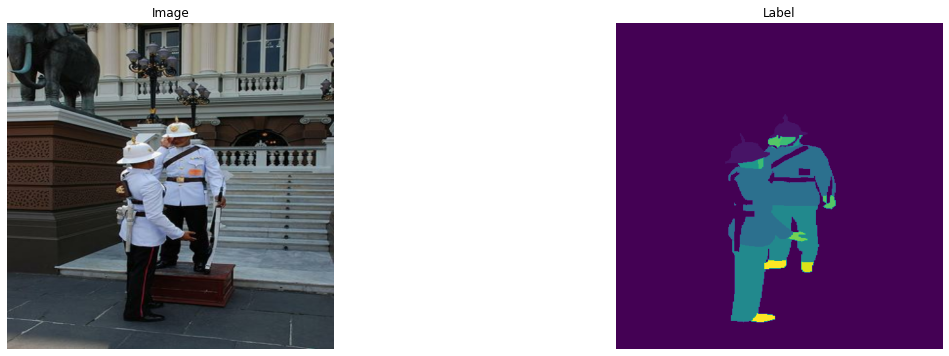

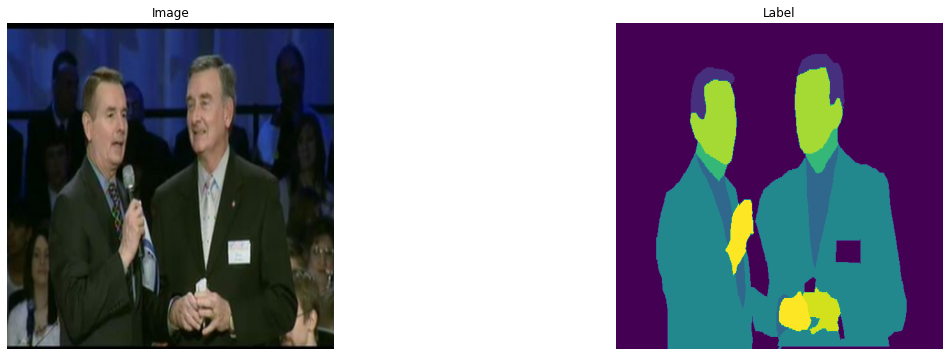

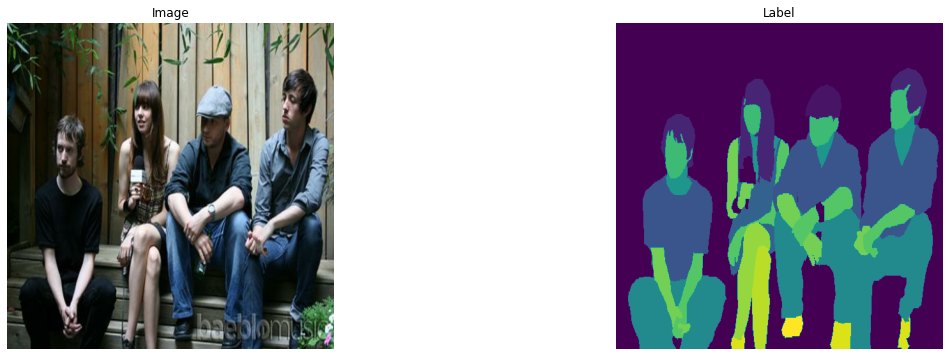

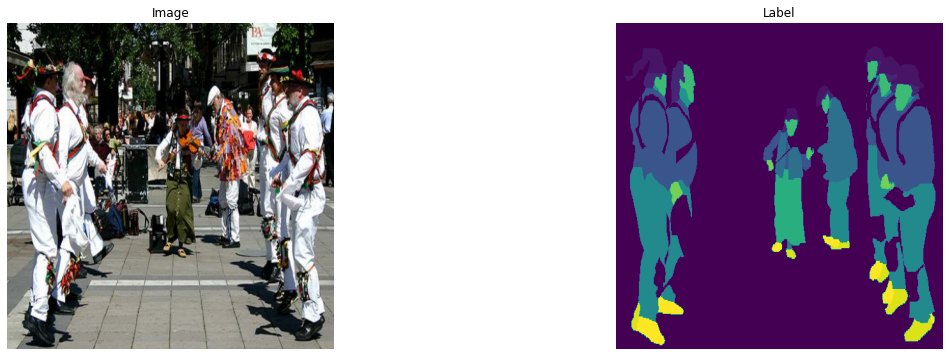

In [6]:
for x, y in dataset.take(4):
    x = (x + 1) * 127.5
    plot_result(
        [x.numpy().astype(np.uint8), y.numpy().astype(np.uint8)],
        ['Image', 'Label'], (20, 6)
    )

In [7]:
augmentation_factory = AugmentationFactory(apply_horizontal_flip=True, apply_jitter=True)
augmented_dataset = augmentation_factory.augment_dataset(dataset)
augmented_dataset

<ParallelMapDataset shapes: ((512, 512, 3), (512, 512, 1)), types: (tf.float32, tf.float32)>

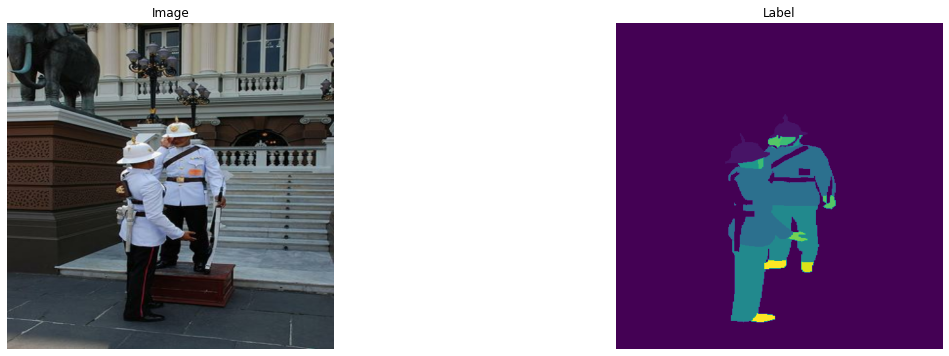

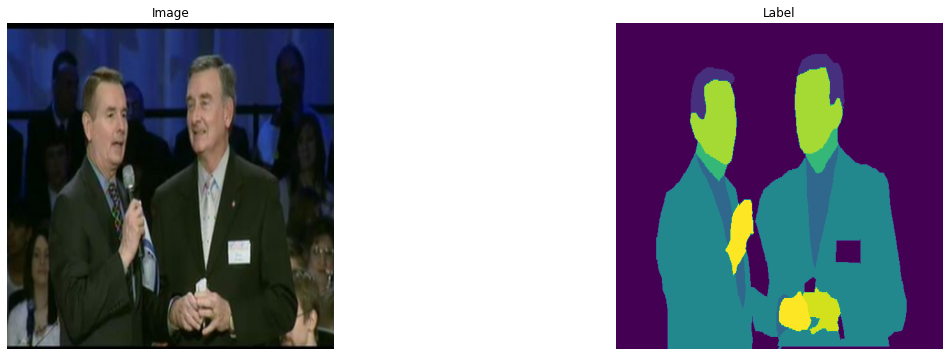

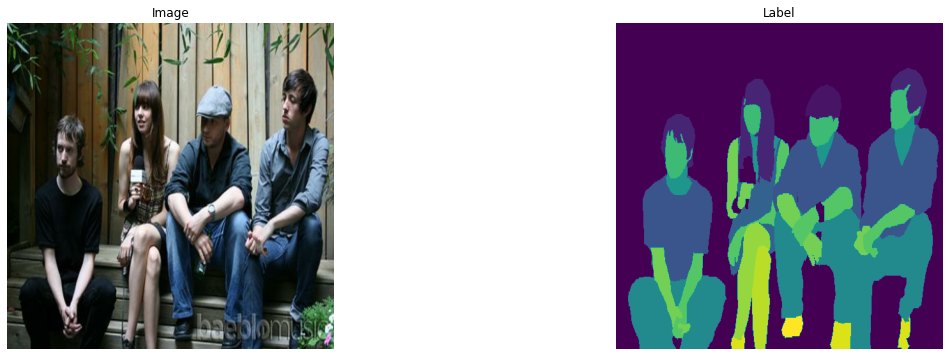

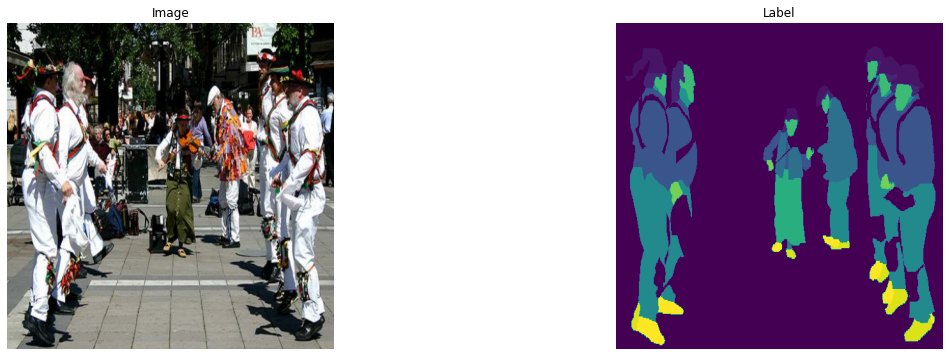

In [8]:
x, y = next(iter(dataset))
for x, y in dataset.take(4):
    x = (x + 1) * 127.5
    plot_result(
        [x.numpy().astype(np.uint8), y.numpy().astype(np.uint8)],
        ['Image', 'Label'], (20, 6)
    )